### Income Prediction

#### Business Understanding
- In today’s data-driven world, understanding the factors that influence income levels is crucial for various stakeholders, including policymakers, businesses, and individuals. By leveraging advanced data analysis and machine learning techniques, we can predict an individual's income based on a variety of demographic, educational, and occupational features. This insight can be instrumental in shaping economic policies, designing targeted marketing strategies, and offering personalized financial advice.

#### Objectives
- The primary objective of the income prediction project is to develop a robust predictive model that accurately forecasts an individual’s income based on specific features. This model will help stakeholders to:

- Identify Key Income Determinants: Understand the most significant factors that influence income levels.
Policy Formulation: Assist policymakers in identifying areas where interventions are needed to reduce income inequality and promote economic growth.
- Business Strategy: Enable businesses to segment their market more effectively and tailor their products and services to different income groups.
Personal Financial Planning: Provide individuals with insights into potential income trajectories based on their current profile and career choices.

#### Data Understanding


#### Hypothesis Testing
- Null Hypothesis: There is no significant relationship between age and income level
- Alternate Hypothesis: There is a significant relationship betweeen age and income level

#### Analytical Questions
- What the distribution of Income by age 
- What race tends to make the most income?
- Which gender earns more?
- What is the income distribution?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loading data

In [2]:
df= pd.read_csv("Dataset/train_data.csv")

Exploratory Data Analytics

In [3]:
df.head(10)

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit
5,ID_TZ0005,45,Male,Bachelors degree(BA AB BS),Private,NaN,Married-civilian spouse present,Asian or Pacific Islander,All other,Children or Armed Forces,...,?,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,4438.27,Below limit
6,ID_TZ0006,53,Male,High school graduate,Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,...,US,?,?,?,?,NaN,NaN,NaN,1401.23,Below limit
7,ID_TZ0007,22,Female,High school graduate,Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,...,US,?,?,?,?,NaN,NaN,NaN,661.07,Below limit
8,ID_TZ0008,73,Female,7th and 8th grade,NaN,NaN,Married-civilian spouse present,Black,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1267.30,Below limit
9,ID_TZ0009,22,Female,11th grade,Private,NaN,Married-civilian spouse present,Black,All other,Full-time schedules,...,US,?,?,?,?,NaN,NaN,NaN,3091.18,Below limit


In [4]:
##checking columns and their respective data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [5]:
##checking for null values
df.isnull().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [6]:
##checking for duplicates
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,209499.0,34.518728,22.306738,0.00,15.00,33.00,50.00,90.0
employment_stat,209499.0,0.176760,0.555562,0.00,0.00,0.00,0.00,2.0
wage_per_hour,209499.0,55.433487,276.757327,0.00,0.00,0.00,0.00,9999.0
working_week_per_year,209499.0,23.158850,24.397963,0.00,0.00,8.00,52.00,52.0
industry_code,209499.0,15.332398,18.049655,0.00,0.00,0.00,33.00,51.0
occupation_code,209499.0,11.321734,14.460839,0.00,0.00,0.00,26.00,46.0
total_employed,209499.0,1.956067,2.365154,0.00,0.00,1.00,4.00,6.0
vet_benefit,209499.0,1.515854,0.850853,0.00,2.00,2.00,2.00,2.0
gains,209499.0,435.926887,4696.359500,0.00,0.00,0.00,0.00,99999.0
losses,209499.0,36.881737,270.383302,0.00,0.00,0.00,0.00,4608.0


In [11]:
# Filter columns with integer data types
int_columns = df.select_dtypes(include=['int64', 'int32', 'float64']).columns

# Create a new DataFrame with only integer columns
int_df = df[int_columns]

# Check the filtered DataFrame
print(int_df.head(5))


   age  employment_stat  wage_per_hour  working_week_per_year  industry_code  \
0   79                0              0                     52              0   
1   65                0              0                      0              0   
2   21                0            500                     15             41   
3    2                0              0                      0              0   
4   70                0              0                      0              0   

   occupation_code  total_employed  vet_benefit  gains  losses  stocks_status  \
0                0               2            2      0       0            292   
1                0               0            2      0       0              0   
2               26               4            2      0       0              0   
3                0               0            0      0       0              0   
4                0               0            2      0       0              0   

   mig_year  importance_of_recor

                            age  employment_stat  wage_per_hour  \
age                    1.000000        -0.001038       0.035477   
employment_stat       -0.001038         1.000000       0.057123   
wage_per_hour          0.035477         0.057123       1.000000   
working_week_per_year  0.204703         0.268320       0.194797   
industry_code          0.158260         0.255169       0.164122   
occupation_code        0.117173         0.231336       0.193280   
total_employed         0.139649         0.242333       0.190484   
vet_benefit            0.674777         0.177809       0.111935   
gains                  0.054507         0.014691       0.003686   
losses                 0.062694         0.024482       0.013480   
stocks_status          0.104979        -0.004663      -0.006764   
mig_year               0.004655         0.009055       0.001744   
importance_of_record   0.000648         0.014489       0.013952   

                       working_week_per_year  industry_code  

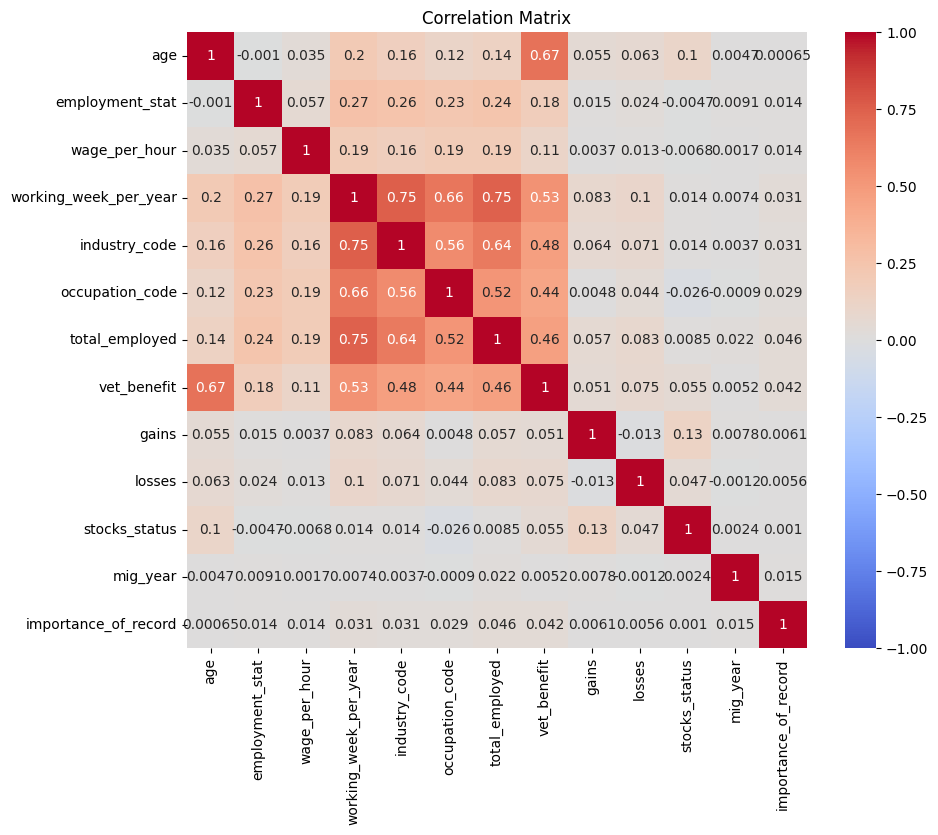

In [12]:
correlation_matrix = int_df.corr(method='pearson')  # You can also use 'spearman' or 'kendall'

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

#### Observations and Key Insights to Note

#### Univariate Analysis

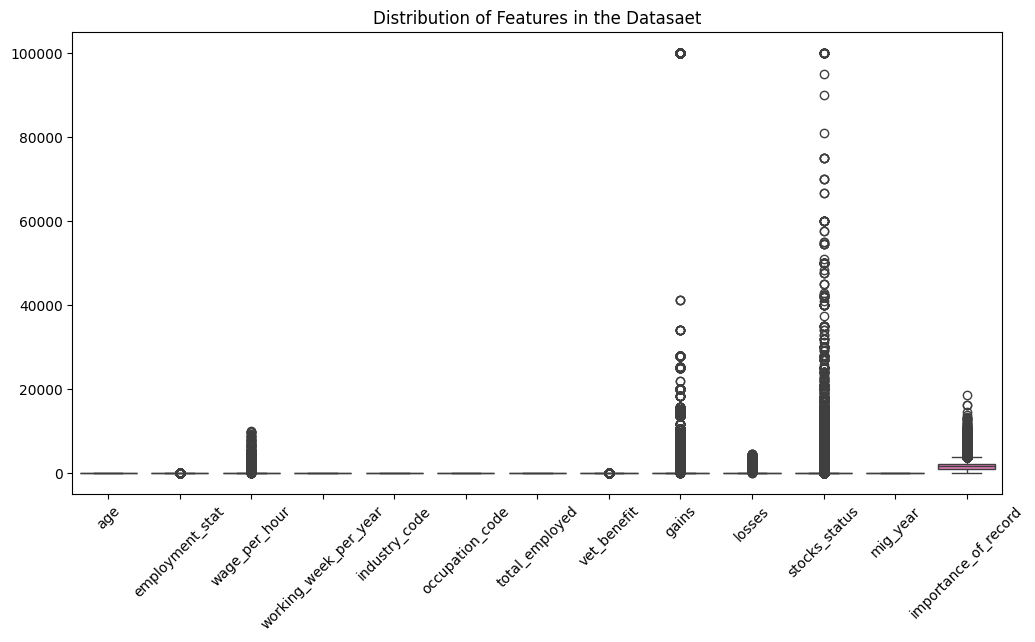

In [17]:
## Checking the distribution of Features in the dataset
df_filtered = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,6))
plt.title("Distribution of Features in the Datasaet")
sns.boxplot(data=df_filtered)
plt.xticks(rotation=45) 
plt.show()

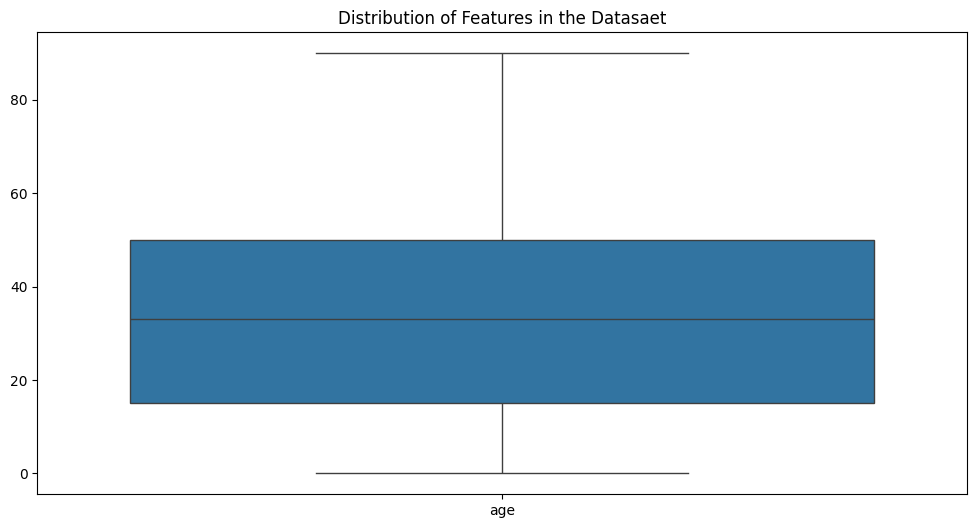

In [24]:
## Checking the distribution of Features in the dataset
df_filtered = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,6))
plt.title("Distribution of Features in the Datasaet")
sns.boxplot(data=df_filtered.iloc[:, :1 ])
plt.show()

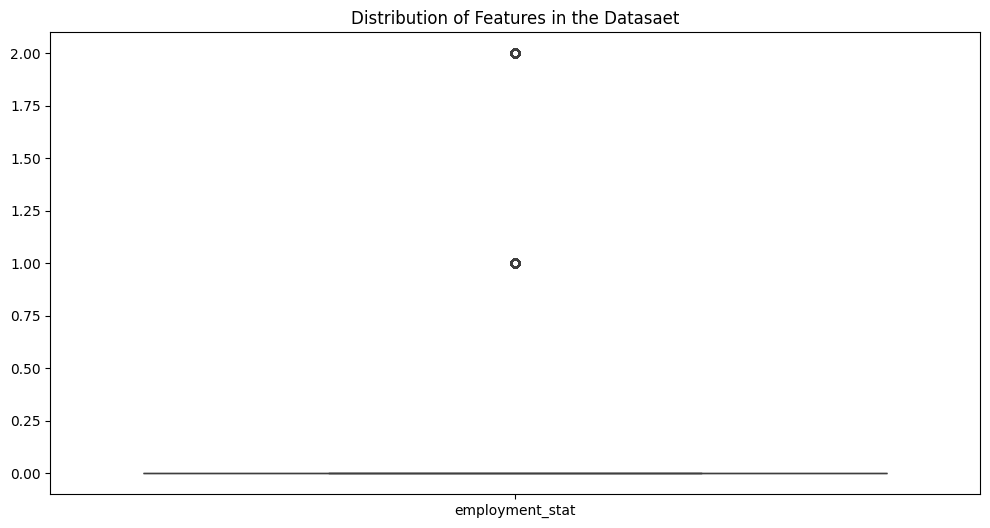

In [25]:
## Checking the distribution of Features in the dataset
df_filtered = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,6))
plt.title("Distribution of Features in the Datasaet")
sns.boxplot(data=df_filtered.iloc[:, 1:2 ])
plt.show()